# Online News Popularity Prediction 

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
import matplotlib

In [2]:
# read the csv file
data = pd.read_csv('OnlineNewsPopularity.csv')
# data for the first five records
data.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
#checking the shape of the dataframe
data.shape

(39644, 61)

In [4]:
#showing the columns for the data
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [5]:
# Remove all the leading and trailing spaces in the data
data.columns = data.columns.str.lstrip()
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

# Data Preprocessing

In [6]:
# check duplicates
dups = data.duplicated()
print ('Number of duplicate rows = %d' %(dups.sum()))

Number of duplicate rows = 0


In [7]:
#Checking for the null values
print('Number of instances = %d \n Number of attributes =%d' %(data.shape[0],data.shape[1]))
print('----------------------')
data.isnull().sum()

Number of instances = 39644 
 Number of attributes =61
----------------------


url                              0
timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_s

In [8]:
#disaplying the min, max and quartiles of the data
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [9]:
#Correlation among the variables
data.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


In [10]:
data['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

# Exploratory Analysis

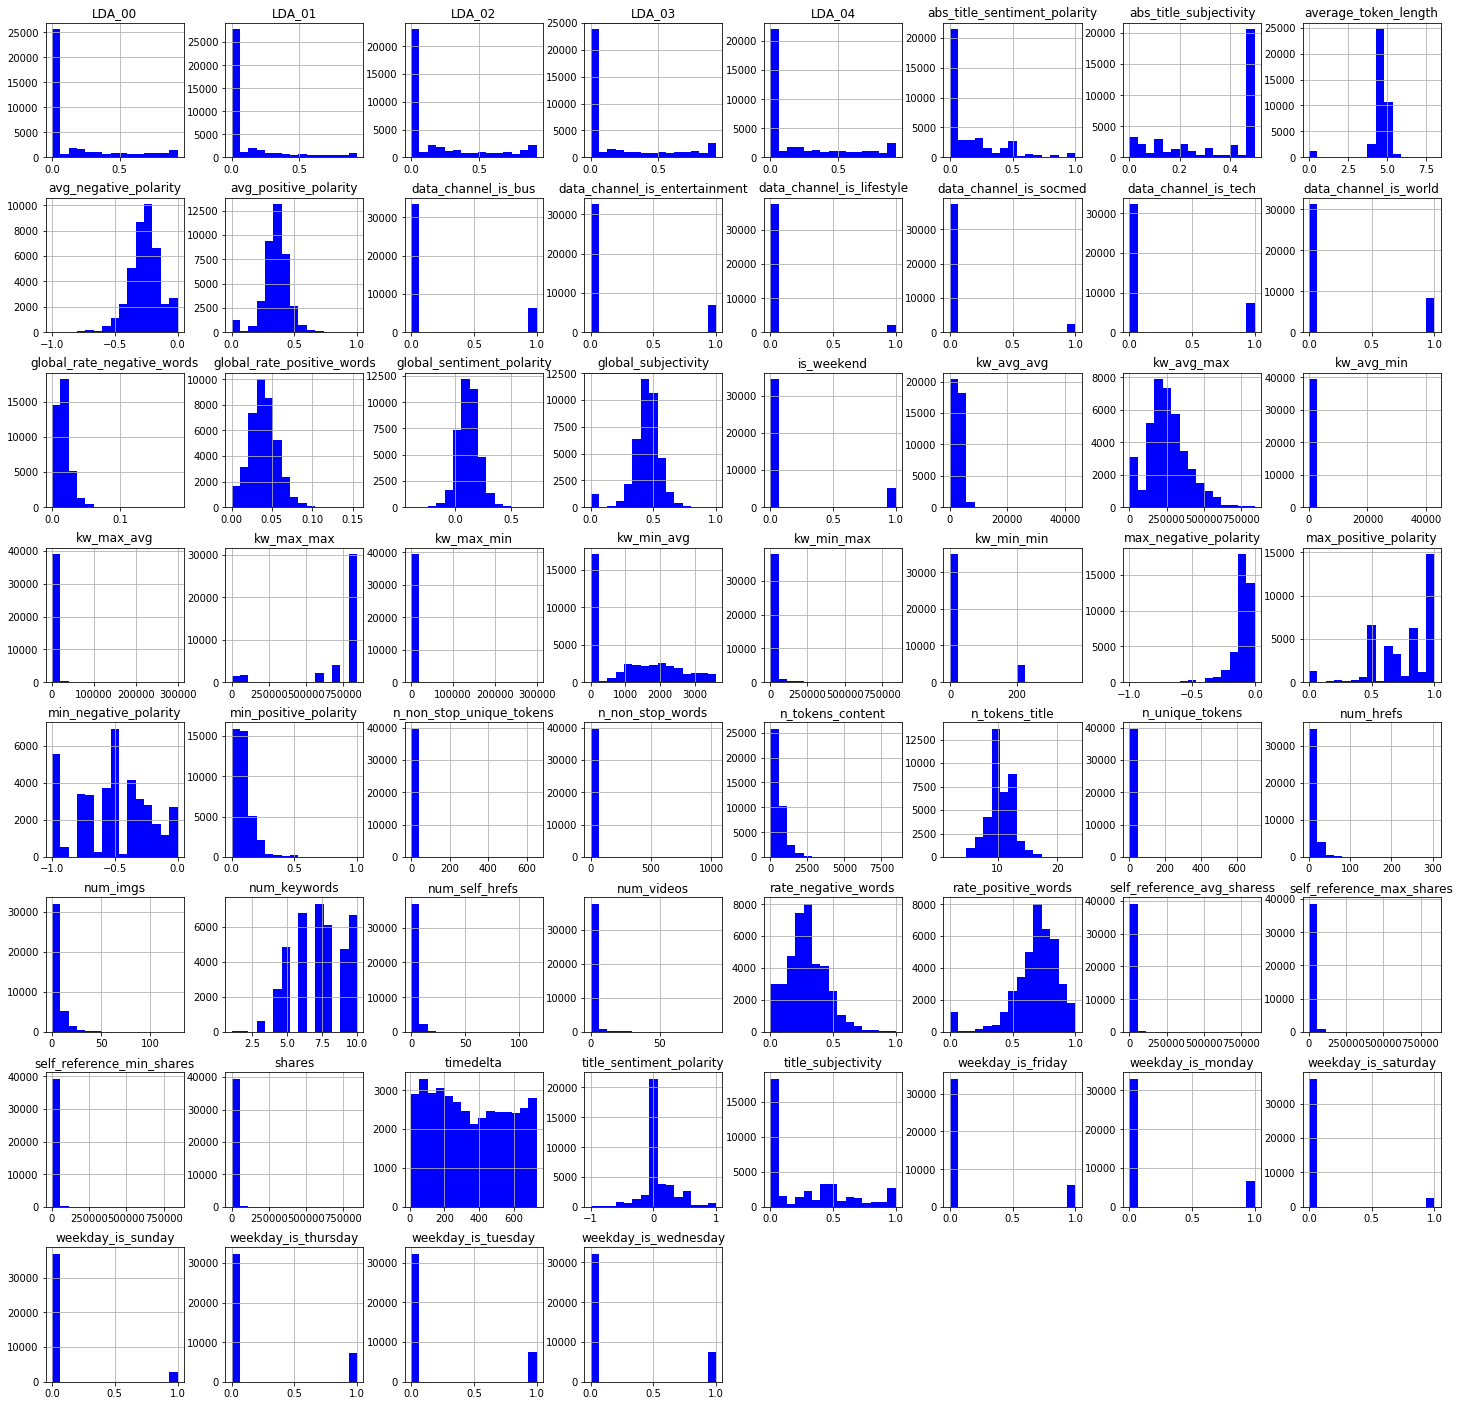

In [11]:
# Histograms
data.hist( figsize=(25,25),bins=15, color = 'b')
plt.show()

Dividing Shares into Popular and Unpopular

In [12]:
#dividing the shares into binary varibales as popular and unpopular
shares_popularity=[]
shareslist=list(data['shares'])
for i in shareslist:
    if(i<=1400):
        shares_popularity.append('Unpopular')
    else:
         shares_popularity.append('Popular')
 

In [13]:
#adding the popularity column
data['Popularity']=pd.Series(shares_popularity)

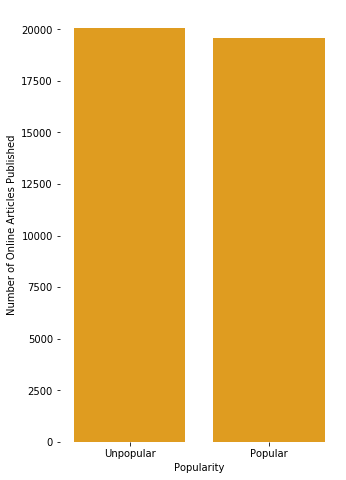

In [14]:
#Visulaizing the number of popular and unpopular labels 
article_count = pd.DataFrame(data.groupby('Popularity').size().sort_values(ascending=False).rename('counts').reset_index())
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(x="Popularity", y="counts", data=article_count.iloc[:10, :],
            label="Total", color="orange")
ax.set(ylabel="Number of Online Articles Published",
       xlabel="Popularity")
sns.despine(left=True, bottom=True)
plt.show()

In [15]:
#converting the columns of days published in to one column for visulaization
num_rows=len(data)
days_list=[]
for i in range(num_rows):
    if(data['weekday_is_monday'][i]==1):
        days_list.append('Monday')
    elif(data['weekday_is_tuesday'][i]==1):
        days_list.append('Tuesday')
    elif(data['weekday_is_wednesday'][i]==1):
        days_list.append('Wednesday')
    elif(data['weekday_is_thursday'][i]==1):
        days_list.append('Thursday')
    elif(data['weekday_is_friday'][i]==1):
        days_list.append('Friday')
    elif(data['weekday_is_saturday'][i]==1):
        days_list.append('Saturday')
    else:
        days_list.append('Sunday')
        

In [16]:
#Adding the column created to the data frame
data['Day Article Published']=pd.Series(days_list)


  Day Article Published  counts
0             Wednesday    7435
1               Tuesday    7390
2              Thursday    7267
3                Monday    6661
4                Friday    5701
5                Sunday    2737
6              Saturday    2453


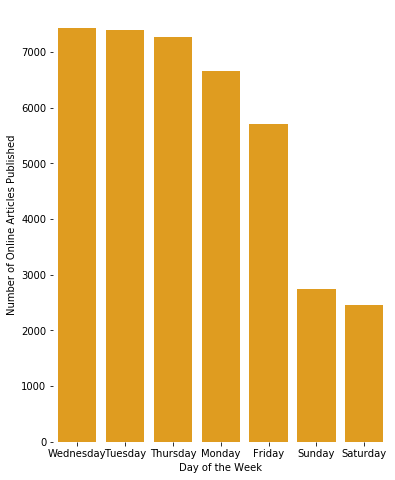

In [17]:
#Visulization for the number of articles published for each of week
article_count_day_wise = pd.DataFrame(data.groupby('Day Article Published').size().sort_values(ascending=False).rename('counts').reset_index())
print(article_count_day_wise)
f, ax = plt.subplots(figsize=(6, 8))
sns.barplot(x="Day Article Published", y="counts", data=article_count_day_wise.iloc[:10, :],
            label="Total", color="orange")
ax.set(ylabel="Number of Online Articles Published",
       xlabel="Day of the Week")
sns.despine(left=True, bottom=True)
plt.show()

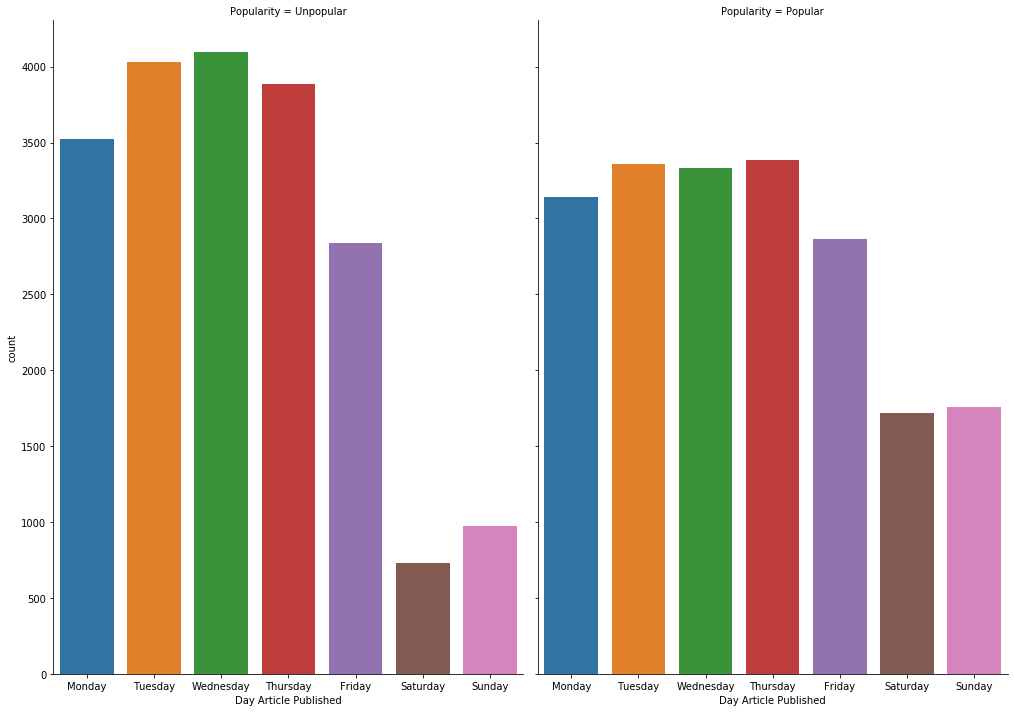

In [18]:
#Visulization for the number of articles published for each of week along with their popularity
ax = sns.catplot(x='Day Article Published', col="Popularity", data=data, kind="count", height=10, aspect=.7)


In [19]:
#merging the communication columns into one 
communication_channel_list=[]
for i in range(num_rows):
    if(data['data_channel_is_lifestyle'][i]==1):
        communication_channel_list.append('Lifestyle')
    elif(data['data_channel_is_entertainment'][i]==1):
        communication_channel_list.append('Entertainment')
    elif(data['data_channel_is_bus'][i]==1):
        communication_channel_list.append('Bus')
    elif(data['data_channel_is_socmed'][i]==1):
        communication_channel_list.append('Socmed')
    elif(data['data_channel_is_tech'][i]==1):
        communication_channel_list.append('Technology')
    else:
        communication_channel_list.append('World')
data['Data Channel']=pd.Series(communication_channel_list)

    Data Channel  counts
0          World   14561
1     Technology    7346
2  Entertainment    7057
3            Bus    6258
4         Socmed    2323
5      Lifestyle    2099


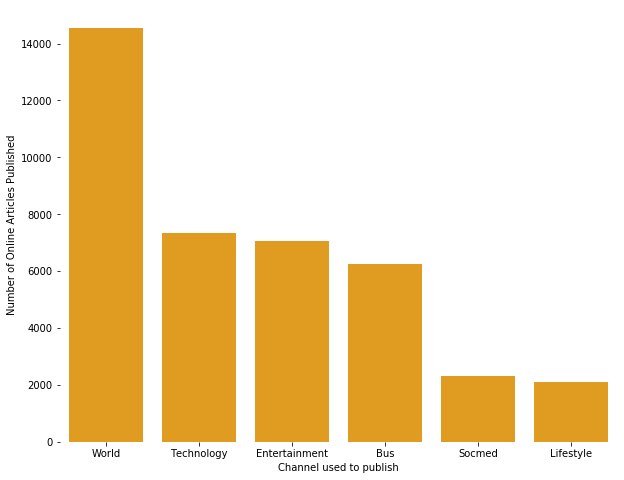

In [20]:
#Visulization for the number of articles for each communication channel
channel_published = pd.DataFrame(data.groupby('Data Channel').size().sort_values(ascending=False).rename('counts').reset_index())
print(channel_published)
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x="Data Channel", y="counts", data=channel_published.iloc[:10, :],
            label="Total", color="orange")
ax.set(ylabel="Number of Online Articles Published",
       xlabel="Channel used to publish")
sns.despine(left=True, bottom=True)
plt.show()

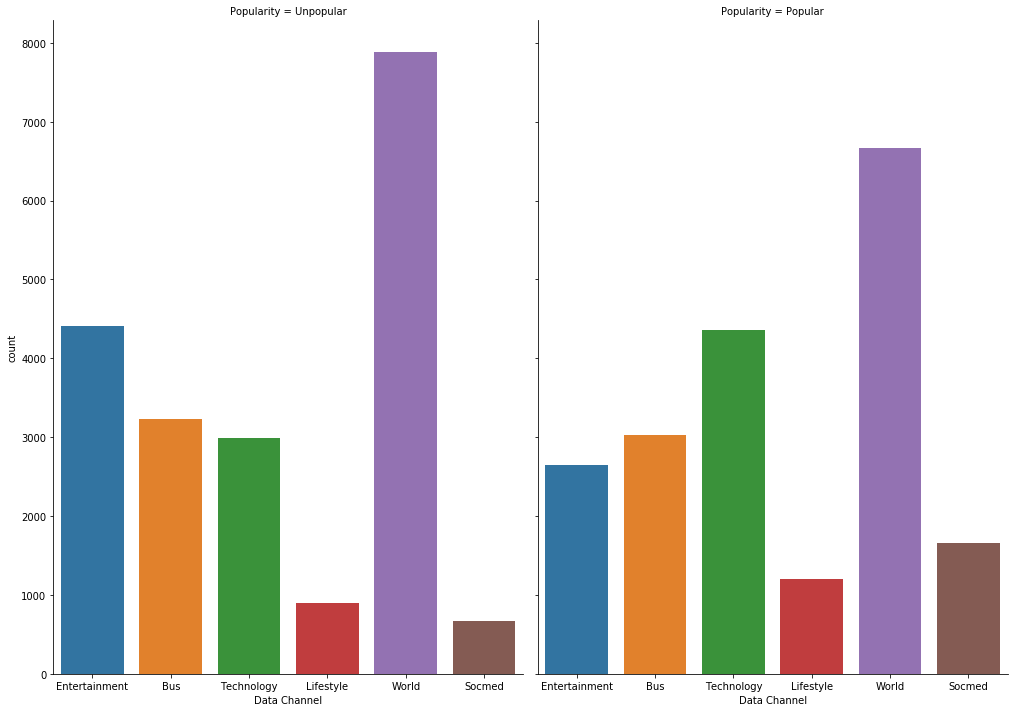

In [21]:
#visulaizing the channel for communication along with the popularity 
ax = sns.catplot(x='Data Channel', col="Popularity", data=data, kind="count", height=10, aspect=.7)

In [22]:
data['n_tokens_content'].describe()

count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

In [23]:
#adding the content column where the articles are divided by length
article_length=[]
article_tokens=list(data['n_tokens_content'])
for i in article_tokens:
    if(i<246):
        article_length.append('Short_Length')
    elif(i >= 246 and i <=409):
        article_length.append('Average_Length')
    else:
         article_length.append('Lengthy') 

In [24]:
data['Content_Length']=pd.Series(article_length)

   Content_Length  counts
0         Lengthy   19816
1  Average_Length    9980
2    Short_Length    9848


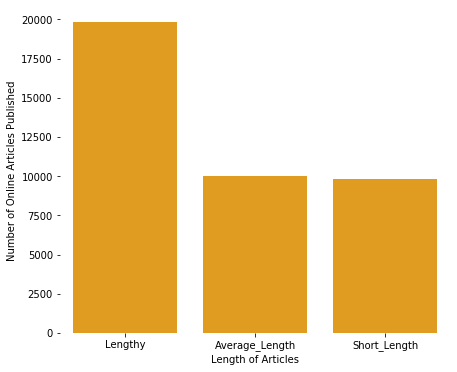

In [25]:
#Visulization for the number of articles by their length
Length_Of_article = pd.DataFrame(data.groupby('Content_Length').size().sort_values(ascending=False).rename('counts').reset_index())
print(Length_Of_article)
f, ax = plt.subplots(figsize=(7, 6))
sns.barplot(x="Content_Length", y="counts", data=Length_Of_article.iloc[:10, :],
            label="Total", color="orange")
ax.set(ylabel="Number of Online Articles Published",
       xlabel="Length of Articles")
sns.despine(left=True, bottom=True)
plt.show()

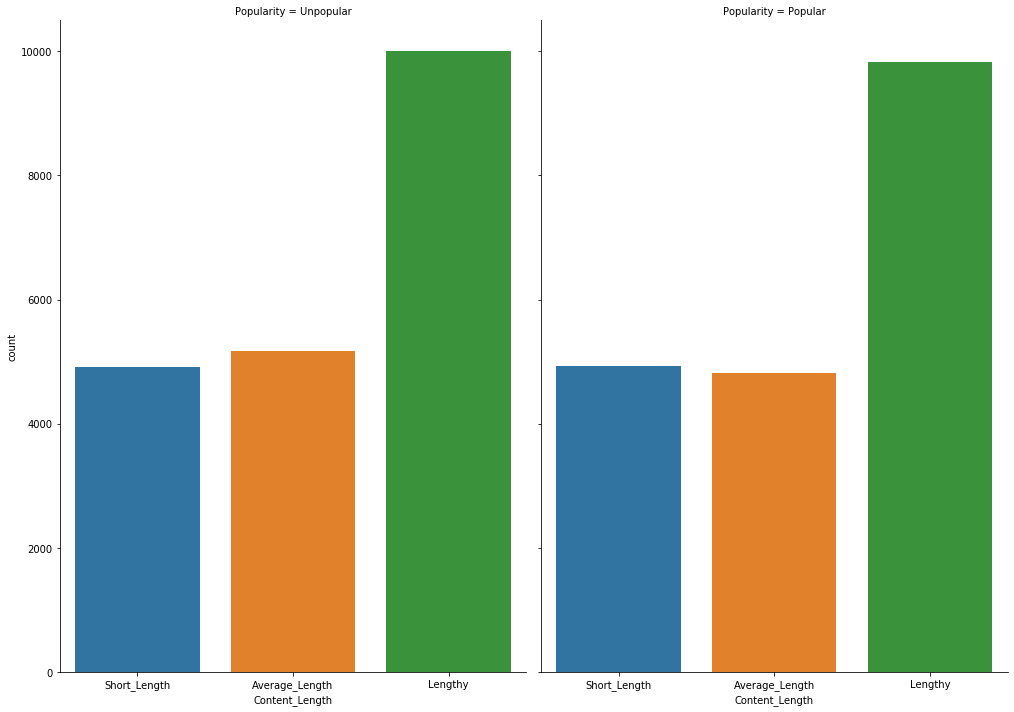

In [26]:
#visulaizing the articles by their length along with the popularity 
ax = sns.catplot(x='Content_Length', col="Popularity", data=data, kind="count", height=10, aspect=.7)

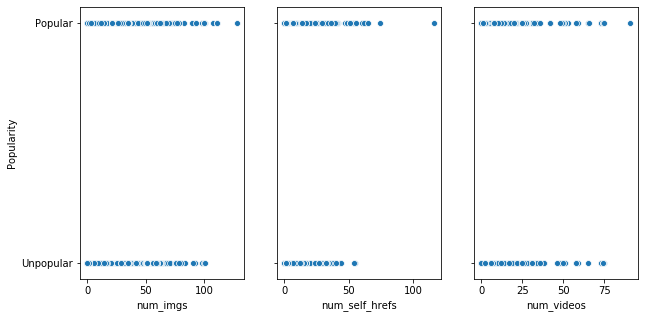

In [27]:
#visulaizing the articles by the number of videos, images and references along with popularity
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True,figsize=(10,5))
sns.scatterplot(x='num_imgs',y='Popularity', data=data,ax=ax1)
sns.scatterplot(x='num_self_hrefs',y='Popularity', data=data,ax=ax2)
sns.scatterplot(x='num_videos',y='Popularity', data=data,ax=ax3)

In [28]:
#Droppin the columns
data=data.drop(['url','timedelta','Content_Length','Data Channel','Day Article Published'],axis=1)
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular


In [29]:
#merging the column of weekdays into one for model training
num_rows=len(data)
days_list=[]
for i in range(num_rows):
    if(data['weekday_is_monday'][i]==1):
        days_list.append(1)
    elif(data['weekday_is_tuesday'][i]==1):
        days_list.append(2)
    elif(data['weekday_is_wednesday'][i]==1):
        days_list.append(3)
    elif(data['weekday_is_thursday'][i]==1):
        days_list.append(4)
    elif(data['weekday_is_friday'][i]==1):
        days_list.append(5)
    elif(data['weekday_is_saturday'][i]==1):
        days_list.append(6)
    else:
        days_list.append(7)
data['Day Article Published']=pd.Series(days_list)

In [30]:
#merging the column of data communication into one for model training
communication_channel_list=[]
for i in range(num_rows):
    if(data['data_channel_is_lifestyle'][i]==1):
        communication_channel_list.append(1)
    elif(data['data_channel_is_entertainment'][i]==1):
        communication_channel_list.append(2)
    elif(data['data_channel_is_bus'][i]==1):
        communication_channel_list.append(3)
    elif(data['data_channel_is_socmed'][i]==1):
        communication_channel_list.append(4)
    elif(data['data_channel_is_tech'][i]==1):
        communication_channel_list.append(5)
    else:
        communication_channel_list.append(6)
data['Data Channel']=pd.Series(communication_channel_list)

In [31]:
#droppin the columns 
data=data.drop(['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech'],axis=1)
data=data.drop(['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday'],axis=1)
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity,Day Article Published,Data Channel
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular,1,2
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular,1,3
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular,1,3
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular,1,2
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular,1,5


In [32]:
df_unbalanced=data
df_unbalanced.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity,Day Article Published,Data Channel
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular,1,2
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular,1,3
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular,1,3
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular,1,2
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular,1,5


In [33]:
df_unbalanced['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [34]:
#forming the column for unbalanced data
shares_popularity=[]
shareslist=list(df_unbalanced['shares'])
for i in shareslist:
    if(i<=946):
        shares_popularity.append('Unpopular')
    elif(i>946 and i<=2800 ):
        shares_popularity.append('Average')
    else:
         shares_popularity.append('Popular')
df_unbalanced['Popularity']=pd.Series(shares_popularity)
popularity=[]
popularlist=list(df_unbalanced['Popularity'])
for i in popularlist:
    if(i=='Unpopular' or i=='Average' ):
        popularity.append(0)
    else:
         popularity.append(1) 
df_unbalanced['Popularity']=pd.Series(popularity)
df_unbalanced.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity,Day Article Published,Data Channel
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0,1,2
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0,1,3
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0,1,3
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0,1,2
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0,1,5


# Applying statistical Methods to Unbalanced Data

In [35]:
X_unbalanced=data.drop(['shares','Popularity'],axis=1)
Y_unbalanced=data['Popularity']

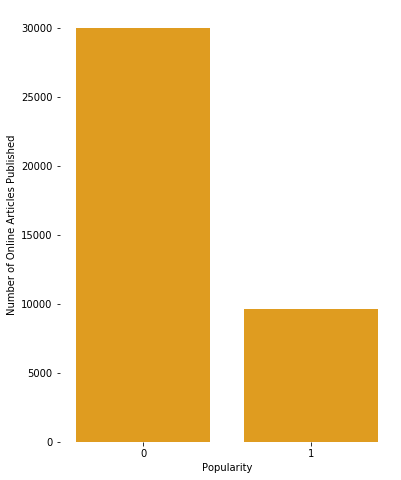

In [36]:
#Visulaizing the labels for unbalaced data
article_count = pd.DataFrame(df_unbalanced.groupby('Popularity').size().sort_values(ascending=False).rename('counts').reset_index())
f, ax = plt.subplots(figsize=(6, 8))
sns.barplot(x="Popularity", y="counts", data=article_count.iloc[:10, :],
            label="Total", color="orange")
ax.set(ylabel="Number of Online Articles Published",
       xlabel="Popularity")
sns.despine(left=True, bottom=True)
plt.show()

In [37]:
#Dividing the data into training, testing and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X_unbalanced,Y_unbalanced, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [38]:
#fuction to check the accuracy of the model on the validation dataset
def Validation_Accuracy(X_val,y_val,model):
    y_predval = model.predict(X_val)
    print('ACCURACY ON VALIDATION DATASET',metrics.accuracy_score(y_val, y_predval)*100)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_val, y_predval))
    print(confusion_matrix(y_val, y_predval))

In [39]:
#function to test the accuracy on the testing dataset
def TestData_Accuracy(X_test,y_test,model):
    y_predlr = model.predict(X_test)
    print('ACCURACY ON TESTING DATASET',metrics.accuracy_score(y_test, y_predlr)*100)
    print(classification_report(y_test, y_predlr))
    print(confusion_matrix(y_test, y_predlr))

In [40]:
#Function to plot the ROC-AUC curve
def plot_ROC(X_test,y_test,model):
    y_score = model.predict_proba(X_test)[:,1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
    print('roc_auc_score:', roc_auc_score(y_test, y_score))
    plt.subplots(1, figsize=(8,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [41]:
#function to calculate the value of K for KNN algorithm
def calculate_K(X,Y):
    scores = []
    dict_score={}
    K_Range = range(1, 10)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
    for K in K_Range:
        knn = KNeighborsClassifier(n_neighbors=K)
        knn.fit(X_train, Y_train.values.ravel())
        y_pred = knn.predict(X_test)
        scores.append(metrics.accuracy_score(Y_test, y_pred))
        #storing k as key and the accuracy as value
        dict_score[K]=metrics.accuracy_score(Y_test, y_pred)
    #storing the value of k with max accuracy
    Keymax = max(dict_score, key=dict_score.get) 
    plt.plot(K_Range, scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Testing Accuracy')
    plt.show()
    return Keymax

# Traning and testing the classification algorithms on the unbalanced data

ACCURACY ON VALIDATION DATASET 75.44136191677175
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      2393
           1       0.50      0.03      0.06       779

    accuracy                           0.75      3172
   macro avg       0.63      0.51      0.46      3172
weighted avg       0.70      0.75      0.66      3172

[[2366   27]
 [ 752   27]]
ACCURACY ON TESTING DATASET 76.02471938453778
              precision    recall  f1-score   support

           0       0.77      0.99      0.86      6002
           1       0.56      0.06      0.11      1927

    accuracy                           0.76      7929
   macro avg       0.66      0.52      0.48      7929
weighted avg       0.72      0.76      0.68      7929

[[5913   89]
 [1812  115]]
ROC AUC LOGISTIC REGRESSION FOR UNBALANCED DATA
roc_auc_score: 0.6335981761485144


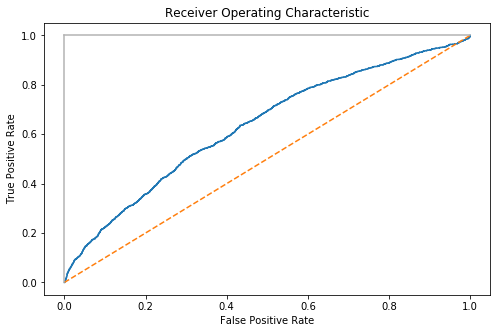

In [42]:
#Training and testing Logistic Regression on unbalanced data
lr=LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
Validation_Accuracy(X_val,y_val,lr)
TestData_Accuracy(X_test,y_test,lr)
print('ROC AUC LOGISTIC REGRESSION FOR UNBALANCED DATA')
plot_ROC(X_test,y_test,lr)

ACCURACY ON VALIDATION DATASET 75.97730138713746
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      2393
           1       0.56      0.10      0.17       779

    accuracy                           0.76      3172
   macro avg       0.67      0.54      0.51      3172
weighted avg       0.72      0.76      0.69      3172

[[2332   61]
 [ 701   78]]
ACCURACY ON TESTING DATASET 75.9112120065582
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      6002
           1       0.52      0.10      0.17      1927

    accuracy                           0.76      7929
   macro avg       0.65      0.53      0.51      7929
weighted avg       0.71      0.76      0.69      7929

[[5829  173]
 [1737  190]]
ROC AUC RANDOM FOREST CLASSIFIER FOR UNBALANCED DATA
roc_auc_score: 0.7069630137126061


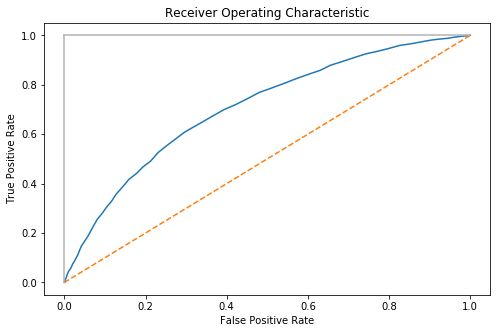

In [43]:
#Training and testing Random Forest on unbalanced data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Validation_Accuracy(X_val,y_val,rf)
TestData_Accuracy(X_test,y_test,rf)
print('ROC AUC RANDOM FOREST CLASSIFIER FOR UNBALANCED DATA')
plot_ROC(X_test,y_test,rf)

Text(0.5, 0, 'Relative Importance')

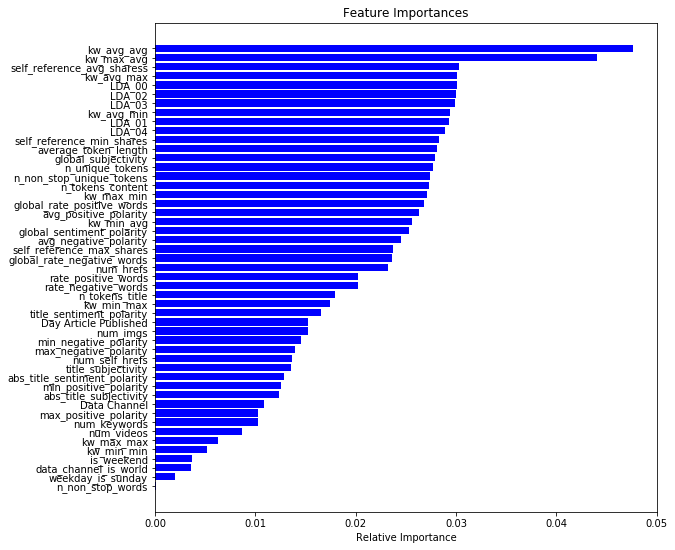

In [44]:
#plotting the important features
from sklearn.ensemble import RandomForestClassifier
imp=pd.DataFrame(rf.feature_importances_, index =X_val.columns)
plt.figure(figsize=(9,9))
features=imp.T.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

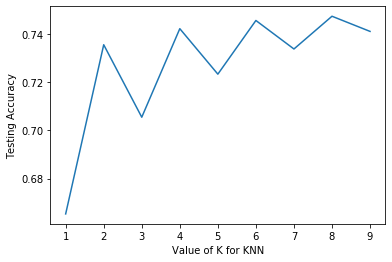

The value of K: 8
ACCURACY ON VALIDATION DATASET 74.6532156368222
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      2393
           1       0.41      0.07      0.13       779

    accuracy                           0.75      3172
   macro avg       0.59      0.52      0.49      3172
weighted avg       0.68      0.75      0.67      3172

[[2310   83]
 [ 721   58]]
ACCURACY ON TESTING DATASET 74.78875015764913
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      6002
           1       0.40      0.07      0.12      1927

    accuracy                           0.75      7929
   macro avg       0.58      0.52      0.49      7929
weighted avg       0.67      0.75      0.67      7929

[[5793  209]
 [1790  137]]
ROC AUC RANDOM K-NEAREST NEIGHBOUR FOR UNBALANCED DATA
roc_auc_score: 0.5936022968991308


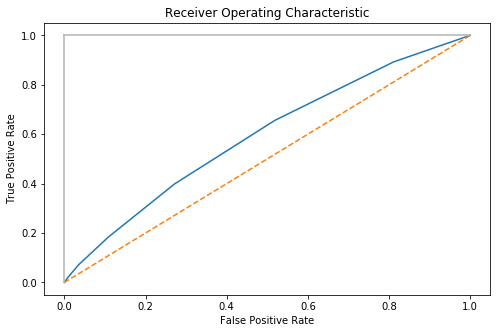

In [45]:
#Training and testing KNN on unbalanced data
k=calculate_K(X_unbalanced,Y_unbalanced)
print("The value of K:",k)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
Validation_Accuracy(X_val,y_val,knn)
TestData_Accuracy(X_test,y_test,knn)
print('ROC AUC RANDOM K-NEAREST NEIGHBOUR FOR UNBALANCED DATA')
plot_ROC(X_test,y_test,knn)

ACCURACY ON VALIDATION DATASET 74.6532156368222
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      2393
           1       0.41      0.07      0.13       779

    accuracy                           0.75      3172
   macro avg       0.59      0.52      0.49      3172
weighted avg       0.68      0.75      0.67      3172

[[2310   83]
 [ 721   58]]
ACCURACY ON TESTING DATASET 74.78875015764913
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      6002
           1       0.40      0.07      0.12      1927

    accuracy                           0.75      7929
   macro avg       0.58      0.52      0.49      7929
weighted avg       0.67      0.75      0.67      7929

[[5793  209]
 [1790  137]]
ROC AUC RANDOM SVM UNBALANCED DATA
roc_auc_score: 0.5936022968991308


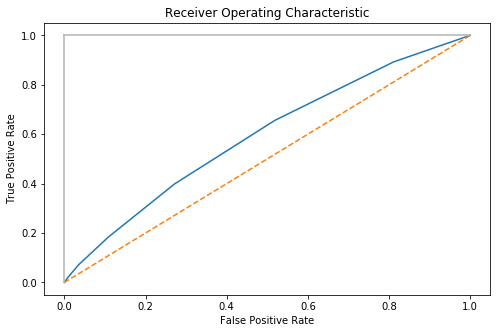

In [46]:
#Training and testing SVM on unbalanced data
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
Validation_Accuracy(X_val,y_val,knn)
TestData_Accuracy(X_test,y_test,knn)
print('ROC AUC RANDOM SVM UNBALANCED DATA')
plot_ROC(X_test,y_test,knn)

In [47]:
#Assigining 0 for unpopular and 1 for popular
shares_popularity=[]
shareslist=list(data['shares'])
for i in shareslist:
    if(i<=1400):
        shares_popularity.append(0)
    else:
         shares_popularity.append(1)
data['Popularity']=pd.Series(shares_popularity) 
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity,Day Article Published,Data Channel
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0,1,2
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0,1,3
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1,1,3
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0,1,2
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0,1,5


# Traning and testing the classification algorithms on the Balanced data

In [48]:
X=data.drop(['shares','Popularity'],axis=1)
Y=data['Popularity']

In [49]:
#Splitting the balanced data into training testing and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

ACCURACY ON VALIDATION DATASET 60.97099621689785
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1615
           1       0.61      0.55      0.58      1557

    accuracy                           0.61      3172
   macro avg       0.61      0.61      0.61      3172
weighted avg       0.61      0.61      0.61      3172

[[1078  537]
 [ 701  856]]
ACCURACY ON TESTING DATASET 60.41114894690377
              precision    recall  f1-score   support

           0       0.60      0.66      0.63      3996
           1       0.61      0.55      0.58      3933

    accuracy                           0.60      7929
   macro avg       0.61      0.60      0.60      7929
weighted avg       0.61      0.60      0.60      7929

[[2644 1352]
 [1787 2146]]
ROC AUC LOGISTIC REGRESSION ON BALANCED DATA
roc_auc_score: 0.6424904436600343


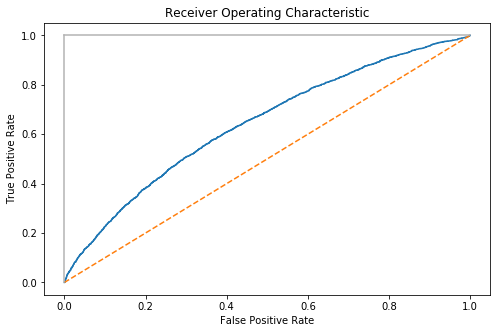

In [50]:
#Traning and testing the logistic regression algorithm on the balanced data
lr=LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
Validation_Accuracy(X_val,y_val,lr)
TestData_Accuracy(X_test,y_test,lr)
print('ROC AUC LOGISTIC REGRESSION ON BALANCED DATA')
plot_ROC(X_test,y_test,lr)

ACCURACY ON VALIDATION DATASET 67.49684741488021
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.67      0.70      0.69      1615
           1       0.68      0.65      0.66      1557

    accuracy                           0.67      3172
   macro avg       0.67      0.67      0.67      3172
weighted avg       0.67      0.67      0.67      3172

[[1127  488]
 [ 543 1014]]
ACCURACY ON TESTING DATASET 67.13330810947156
              precision    recall  f1-score   support

           0       0.67      0.70      0.68      3996
           1       0.68      0.65      0.66      3933

    accuracy                           0.67      7929
   macro avg       0.67      0.67      0.67      7929
weighted avg       0.67      0.67      0.67      7929

[[2782 1214]
 [1392 2541]]
ROC AUC RANDOM FOREST CLASSIFIER ON BALANCED DATA
roc_auc_score: 0.725020119280226


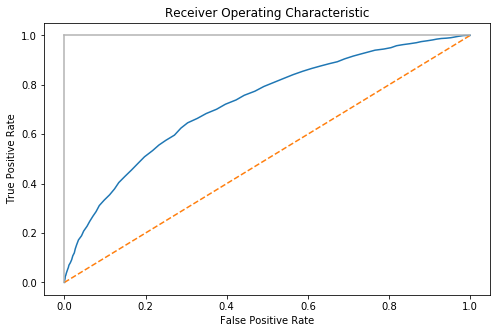

In [51]:
#Traning and testing the random forest algorithm on the balanced data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Validation_Accuracy(X_val,y_val,rf)
TestData_Accuracy(X_test,y_test,rf)
print('ROC AUC RANDOM FOREST CLASSIFIER ON BALANCED DATA')
plot_ROC(X_test,y_test,rf)

Text(0.5, 0, 'Relative Importance')

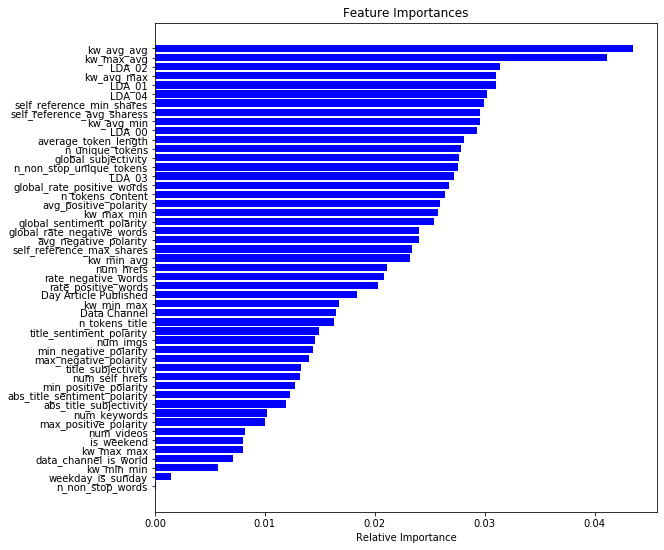

In [52]:
#plotting the feature importance plot for data
imp=pd.DataFrame(rf.feature_importances_, index =X_val.columns)
plt.figure(figsize=(9,9))
features=imp.T.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

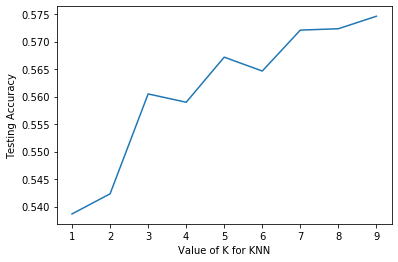

Value of K:, 9
ACCURACY ON VALIDATION DATASET 58.70113493064313
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.59      0.63      0.61      1615
           1       0.59      0.54      0.56      1557

    accuracy                           0.59      3172
   macro avg       0.59      0.59      0.59      3172
weighted avg       0.59      0.59      0.59      3172

[[1014  601]
 [ 709  848]]
ACCURACY ON TESTING DATASET 57.787867322487074
              precision    recall  f1-score   support

           0       0.58      0.61      0.59      3996
           1       0.58      0.54      0.56      3933

    accuracy                           0.58      7929
   macro avg       0.58      0.58      0.58      7929
weighted avg       0.58      0.58      0.58      7929

[[2446 1550]
 [1797 2136]]
ROC AUC RANDOM K-nearest neighbour ON BALANCED DATA
roc_auc_score: 0.6071586460602479


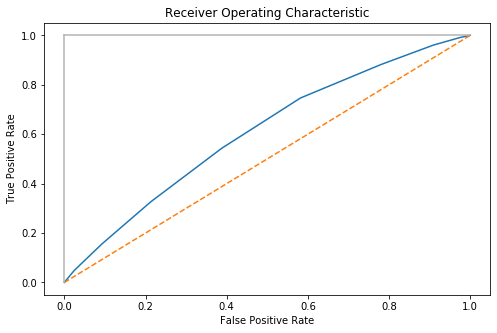

In [53]:
#Traning and testing the KNN on the balanced data
k=calculate_K(X,Y)
print("Value of K:,",k)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
Validation_Accuracy(X_val,y_val,knn)
TestData_Accuracy(X_test,y_test,knn)
print('ROC AUC RANDOM K-nearest neighbour ON BALANCED DATA')
plot_ROC(X_test,y_test,knn)

ACCURACY ON VALIDATION DATASET 58.70113493064313
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.59      0.63      0.61      1615
           1       0.59      0.54      0.56      1557

    accuracy                           0.59      3172
   macro avg       0.59      0.59      0.59      3172
weighted avg       0.59      0.59      0.59      3172

[[1014  601]
 [ 709  848]]
ACCURACY ON TESTING DATASET 57.787867322487074
              precision    recall  f1-score   support

           0       0.58      0.61      0.59      3996
           1       0.58      0.54      0.56      3933

    accuracy                           0.58      7929
   macro avg       0.58      0.58      0.58      7929
weighted avg       0.58      0.58      0.58      7929

[[2446 1550]
 [1797 2136]]
ROC AUC RANDOM SVM ON BALANCED DATA
roc_auc_score: 0.6071586460602479


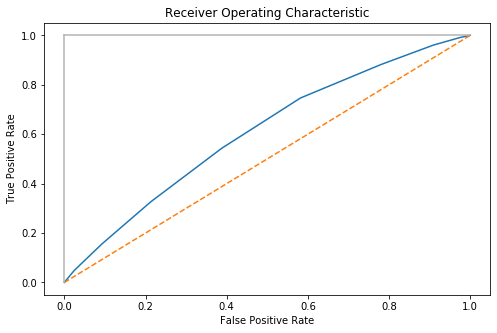

In [54]:
#Traning and testing the SVM algorithm on the balanced data
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
Validation_Accuracy(X_val,y_val,knn)
TestData_Accuracy(X_test,y_test,knn)
print('ROC AUC RANDOM SVM ON BALANCED DATA')
plot_ROC(X_test,y_test,knn)

# APPLYING PCA TO THE DATA AND TRAINING AND TESTING THE CLASSIFICATION MODELS

In [55]:
#Applying standard scaling and PCA to the data and slitting the data
sc = StandardScaler() 
X = sc.fit_transform(X) 
pca = PCA(n_components = 2) 
X = pca.fit_transform(X) 
print( pca.explained_variance_ratio_ )
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

[0.0982386  0.07808692]


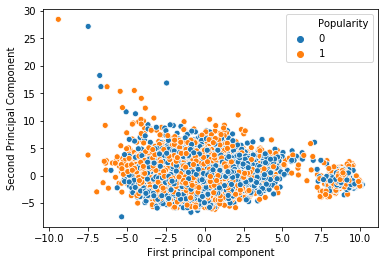

In [56]:
#plotting the PCA components 
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
sns.scatterplot(x=X_train[:,0],y=X_train[:,1], hue=y_train)

ACCURACY ON VALIDATION DATASET 56.557377049180324
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      1615
           1       0.56      0.55      0.55      1557

    accuracy                           0.57      3172
   macro avg       0.57      0.57      0.57      3172
weighted avg       0.57      0.57      0.57      3172

[[945 670]
 [708 849]]
ACCURACY ON TESTING DATASET 56.072644721906926
              precision    recall  f1-score   support

           0       0.56      0.59      0.57      3996
           1       0.56      0.54      0.55      3933

    accuracy                           0.56      7929
   macro avg       0.56      0.56      0.56      7929
weighted avg       0.56      0.56      0.56      7929

[[2340 1656]
 [1827 2106]]
ROC AUC LOGISTIC REGRESSION ON PCA DATA
roc_auc_score: 0.5831414938966426


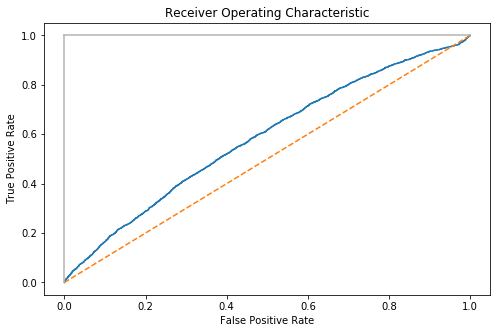

In [57]:
#Traning and testing the logistic regression algorithm on the PCA data
lr=LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
Validation_Accuracy(X_val,y_val,lr)
TestData_Accuracy(X_test,y_test,lr)
print('ROC AUC LOGISTIC REGRESSION ON PCA DATA')
plot_ROC(X_test,y_test,lr)

ACCURACY ON VALIDATION DATASET 54.60277427490542
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.55      0.58      0.57      1615
           1       0.54      0.51      0.53      1557

    accuracy                           0.55      3172
   macro avg       0.55      0.55      0.55      3172
weighted avg       0.55      0.55      0.55      3172

[[936 679]
 [761 796]]
ACCURACY ON TESTING DATASET 52.6926472442931
              precision    recall  f1-score   support

           0       0.53      0.55      0.54      3996
           1       0.52      0.51      0.52      3933

    accuracy                           0.53      7929
   macro avg       0.53      0.53      0.53      7929
weighted avg       0.53      0.53      0.53      7929

[[2178 1818]
 [1933 2000]]
ROC AUC RANDOM FOREST CLASSIFIER ON PCA DATA
roc_auc_score: 0.5412437609233949


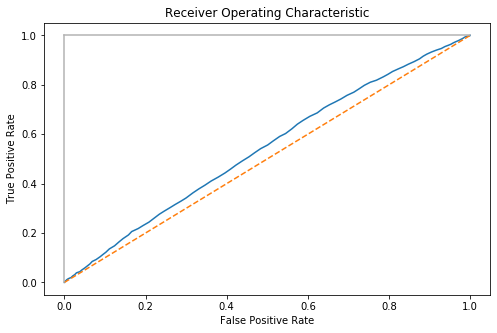

In [58]:
#Traning and testing the Random Forest algorithm on the PCA data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Validation_Accuracy(X_val,y_val,rf)
TestData_Accuracy(X_test,y_test,rf)
print('ROC AUC RANDOM FOREST CLASSIFIER ON PCA DATA')
plot_ROC(X_test,y_test,rf)

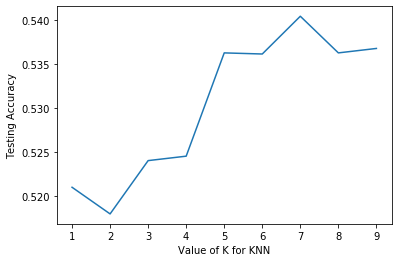

The value of k 7
ACCURACY ON VALIDATION DATASET 52.931904161412355
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1615
           1       0.52      0.50      0.51      1557

    accuracy                           0.53      3172
   macro avg       0.53      0.53      0.53      3172
weighted avg       0.53      0.53      0.53      3172

[[894 721]
 [772 785]]
ACCURACY ON TESTING DATASET 52.20078193971497
              precision    recall  f1-score   support

           0       0.53      0.53      0.53      3996
           1       0.52      0.51      0.51      3933

    accuracy                           0.52      7929
   macro avg       0.52      0.52      0.52      7929
weighted avg       0.52      0.52      0.52      7929

[[2131 1865]
 [1925 2008]]
ROC AUC RANDOM K-nearest neighbour ON PCA DATA
roc_auc_score: 0.5384240393457276


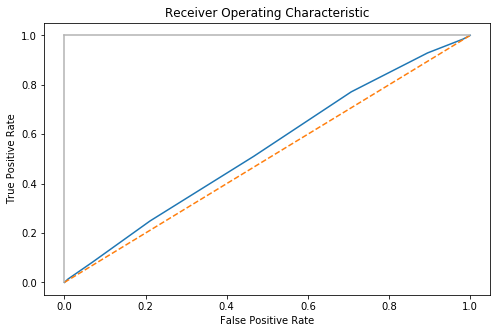

In [59]:
#Traning and testing the KNN algorithm on the PCA data
k=calculate_K(X,Y)
print("The value of k",k)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
Validation_Accuracy(X_val,y_val,knn)
TestData_Accuracy(X_test,y_test,knn)
print('ROC AUC RANDOM K-nearest neighbour ON PCA DATA')
plot_ROC(X_test,y_test,knn)

ACCURACY ON VALIDATION DATASET 52.931904161412355
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1615
           1       0.52      0.50      0.51      1557

    accuracy                           0.53      3172
   macro avg       0.53      0.53      0.53      3172
weighted avg       0.53      0.53      0.53      3172

[[894 721]
 [772 785]]
ACCURACY ON TESTING DATASET 52.20078193971497
              precision    recall  f1-score   support

           0       0.53      0.53      0.53      3996
           1       0.52      0.51      0.51      3933

    accuracy                           0.52      7929
   macro avg       0.52      0.52      0.52      7929
weighted avg       0.52      0.52      0.52      7929

[[2131 1865]
 [1925 2008]]
ROC AUC RANDOM SVM ON PCA DATA
roc_auc_score: 0.5384240393457276


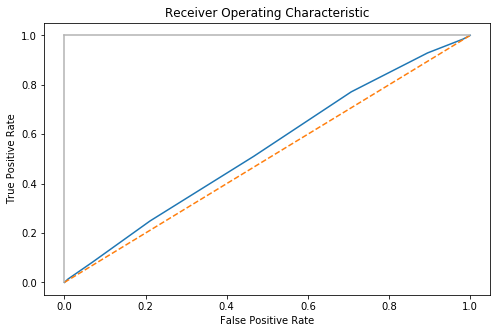

In [60]:
#Traning and testing the SVM algorithm on the PCA data
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
Validation_Accuracy(X_val,y_val,knn)
TestData_Accuracy(X_test,y_test,knn)
print('ROC AUC RANDOM SVM ON PCA DATA')
plot_ROC(X_test,y_test,knn)